In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

In [95]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Построим тепловую карту для анализа отстутствующих значений

<Axes: >

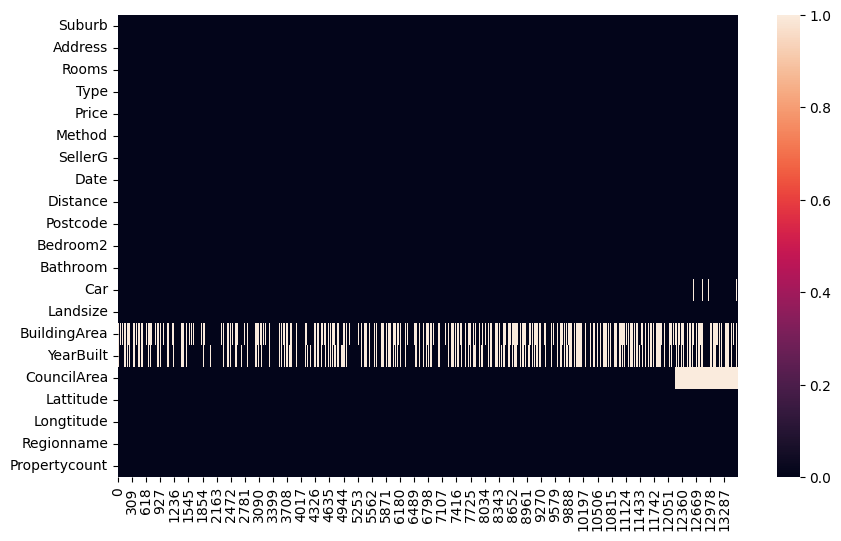

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose())


Матрица корреляции

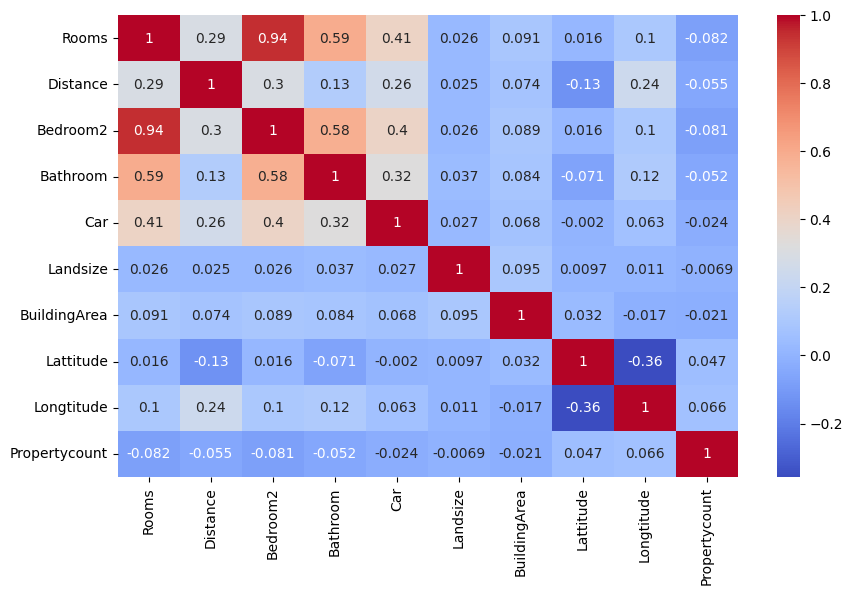

In [109]:
corr_matrix = X.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Гистограммы признаков

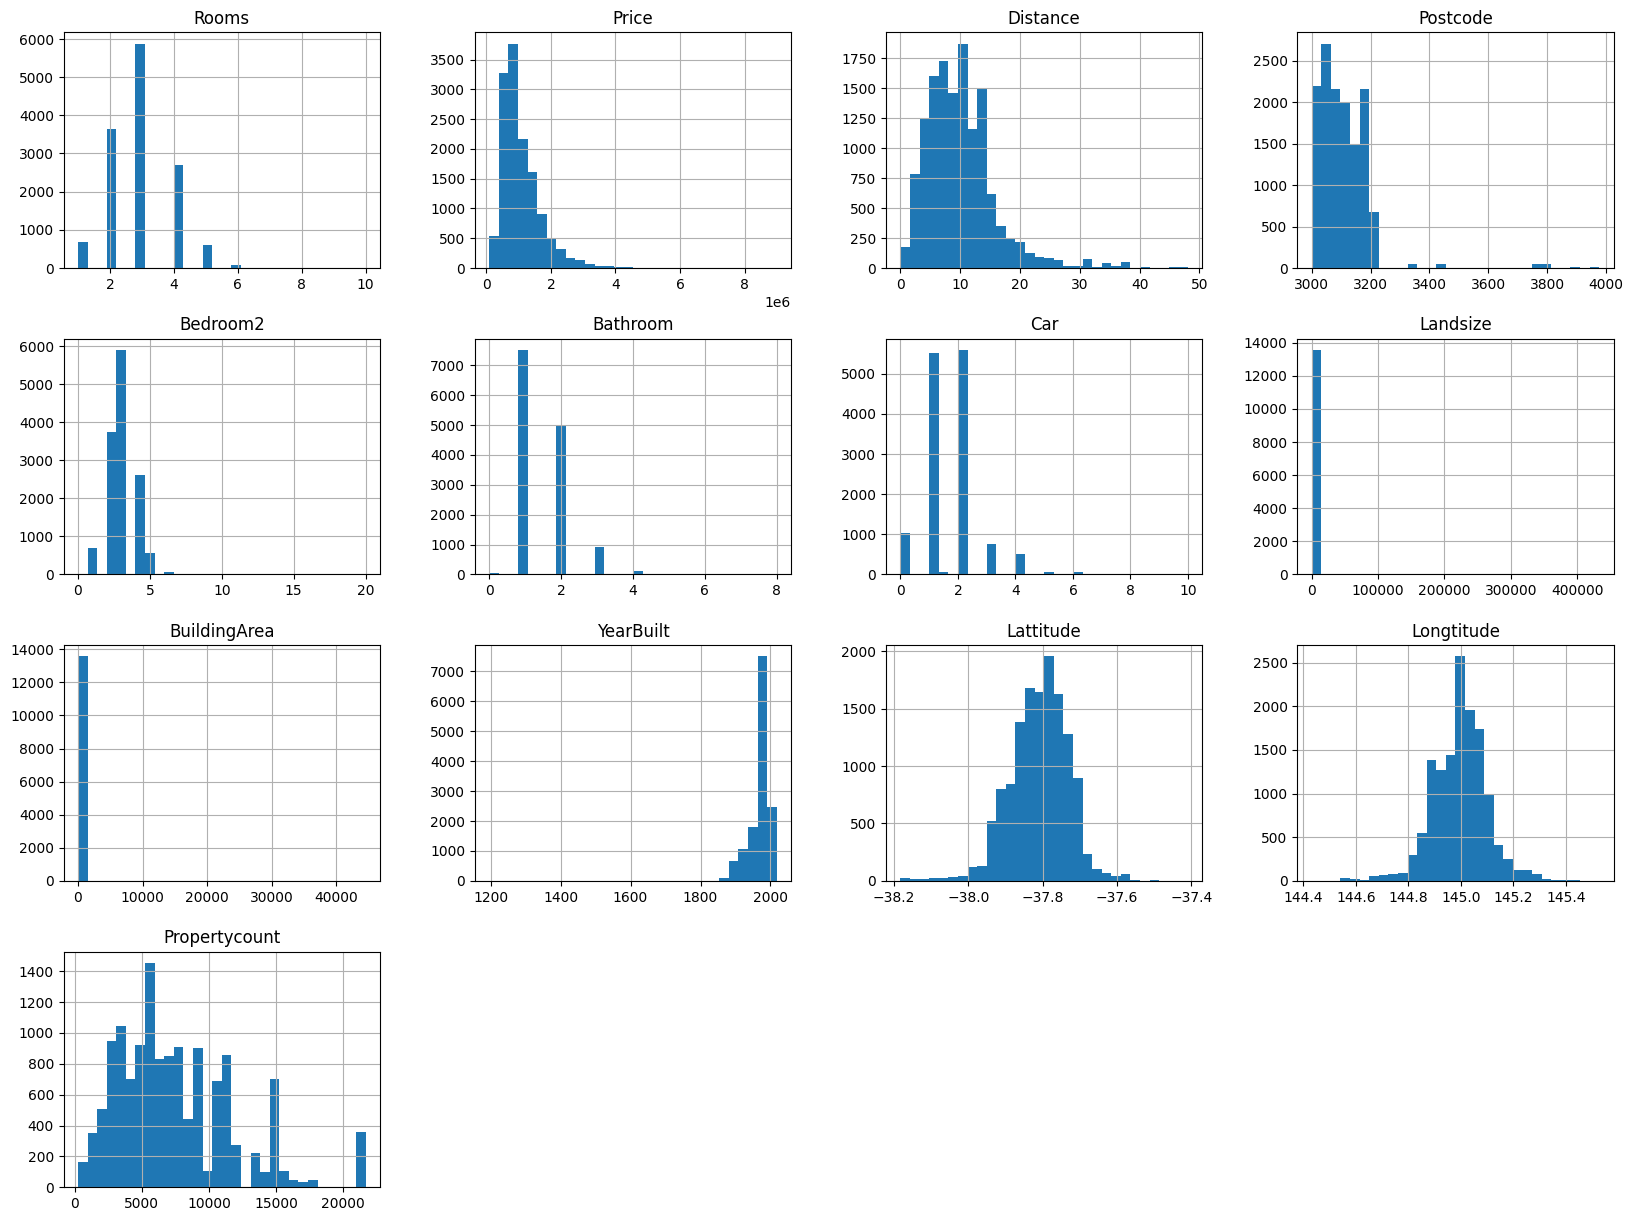

In [107]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

Заполняем отсутстующие значение NaN медианными значениями

In [99]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

Разделяем данные на целевые и не целевые значения

In [100]:
X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Propertycount']]
Y = df['Price']

Разделяем выборку на обучение и тест

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)
X_train.shape, X_test.shape

((10864, 10), (2716, 10))

Масштабируем данные методом нормализации

In [102]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [103]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns = X_train.columns)
X_train_norm
X_test_norm = pd.DataFrame(mms.transform(X_test), columns = X_test.columns)

Обучим модель линейной регрессии

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_norm, Y_train)

Вычисляем погрешность

In [115]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train = lr.predict(X_train_norm)
pred_test = lr.predict(X_test_norm)

print(r2_score(Y_test, pred_test))
print(r2_score(Y_train, pred_train))

0.4840091778864667
0.4789054982120551


График регрессии

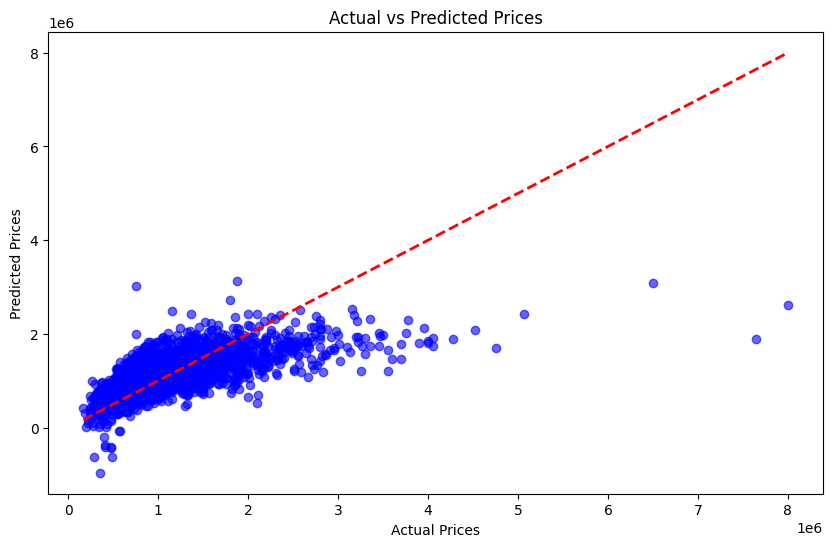

In [116]:
# Реальные значения (Y_test) и предсказанные значения (pred_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, pred_test, color='blue', alpha=0.6)

# Линия идеальных предсказаний
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)

plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()
